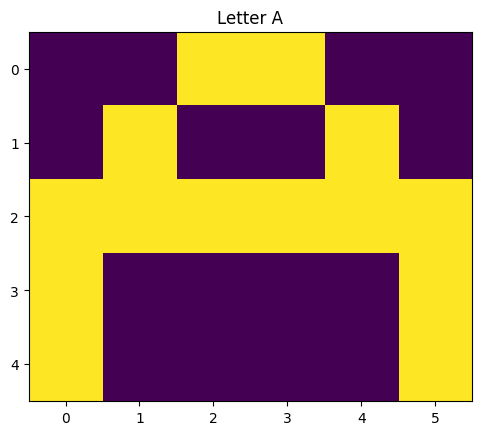

Epoch 1 - Accuracy: 72.45%
Epoch 2 - Accuracy: 75.20%
Epoch 3 - Accuracy: 77.37%
Epoch 4 - Accuracy: 78.86%
Epoch 5 - Accuracy: 79.91%
Epoch 6 - Accuracy: 80.71%
Epoch 7 - Accuracy: 81.34%
Epoch 8 - Accuracy: 81.87%
Epoch 9 - Accuracy: 82.32%
Epoch 10 - Accuracy: 82.72%
Epoch 11 - Accuracy: 83.07%
Epoch 12 - Accuracy: 83.39%
Epoch 13 - Accuracy: 83.68%
Epoch 14 - Accuracy: 83.96%
Epoch 15 - Accuracy: 84.21%
Epoch 16 - Accuracy: 84.45%
Epoch 17 - Accuracy: 84.68%
Epoch 18 - Accuracy: 84.90%
Epoch 19 - Accuracy: 85.11%
Epoch 20 - Accuracy: 85.32%
Epoch 21 - Accuracy: 85.52%
Epoch 22 - Accuracy: 85.71%
Epoch 23 - Accuracy: 85.90%
Epoch 24 - Accuracy: 86.09%
Epoch 25 - Accuracy: 86.27%
Epoch 26 - Accuracy: 86.45%
Epoch 27 - Accuracy: 86.62%
Epoch 28 - Accuracy: 86.80%
Epoch 29 - Accuracy: 86.97%
Epoch 30 - Accuracy: 87.14%
Epoch 31 - Accuracy: 87.30%
Epoch 32 - Accuracy: 87.47%
Epoch 33 - Accuracy: 87.63%
Epoch 34 - Accuracy: 87.79%
Epoch 35 - Accuracy: 87.96%
Epoch 36 - Accuracy: 88.12%
E

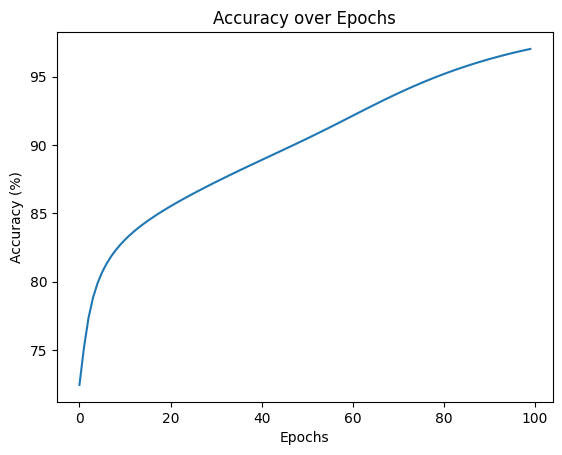

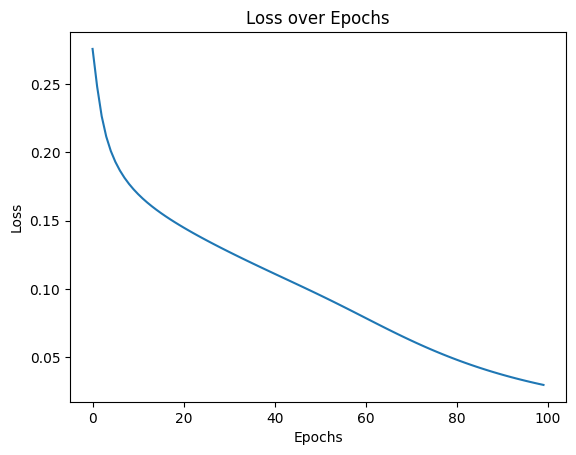

Image is of letter B.


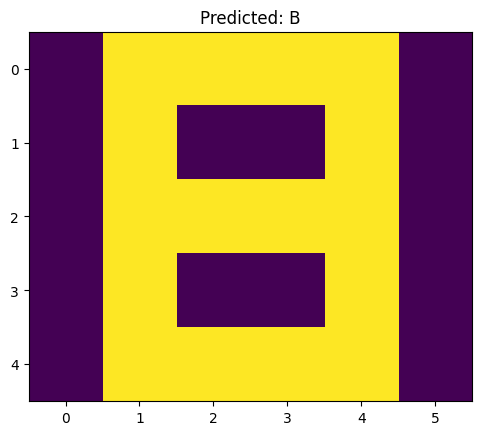

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Tạo dữ liệu cho các chữ cái A, B, C
a = [0, 0, 1, 1, 0, 0,
     0, 1, 0, 0, 1, 0,
     1, 1, 1, 1, 1, 1,
     1, 0, 0, 0, 0, 1,
     1, 0, 0, 0, 0, 1]

b = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0]

c = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 1, 1, 1, 0]

y = [[1, 0, 0],  # A
     [0, 1, 0],  # B
     [0, 0, 1]]  # C

# Step 2: Trực quan hóa dữ liệu
plt.imshow(np.array(a).reshape(5, 6))
plt.title("Letter A")
plt.show()

# Step 3: Chuyển dữ liệu sang NumPy array
x = [np.array(a).reshape(1, 30),
     np.array(b).reshape(1, 30),
     np.array(c).reshape(1, 30)]
x = np.array(x)
y = np.array(y)

# Step 4: Hàm kích hoạt sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Step 5: Feedforward
def f_forward(x, w1, w2):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return a2

# Step 6: Khởi tạo trọng số ngẫu nhiên
def generate_wt(x, y):
    return np.random.randn(x, y)

# Step 7: Hàm mất mát MSE
def loss(out, Y):
    return np.sum(np.square(out - Y)) / len(Y)

# Step 8: Backpropagation
def back_prop(x, y, w1, w2, alpha):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = a2 - y
    d1 = np.multiply((w2.dot(d2.T)).T, np.multiply(a1, 1 - a1))

    w1_adj = x.T.dot(d1)
    w2_adj = a1.T.dot(d2)

    w1 -= alpha * w1_adj
    w2 -= alpha * w2_adj

    return w1, w2

# Step 9: Huấn luyện mô hình
def train(x, y, w1, w2, alpha=0.1, epoch=100):
    acc = []
    losss = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append(loss(out, y[i]))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        avg_loss = sum(l) / len(x)
        acc.append((1 - avg_loss) * 100)
        losss.append(avg_loss)
        print(f"Epoch {j+1} - Accuracy: {acc[-1]:.2f}%")
    return acc, losss, w1, w2

# Step 10: Khởi tạo trọng số và huấn luyện
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
acc, losss, w1, w2 = train(x, y, w1, w2)

# Step 11: Vẽ biểu đồ Accuracy và Loss
plt.plot(acc)
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()

plt.plot(losss)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Step 12: Dự đoán
def predict(x, w1, w2):
    out = f_forward(x, w1, w2)
    label = np.argmax(out)
    letters = ['A', 'B', 'C']
    print(f"Image is of letter {letters[label]}.")
    plt.imshow(x.reshape(5, 6))
    plt.title(f"Predicted: {letters[label]}")
    plt.show()

# Ví dụ: Dự đoán chữ B
predict(x[1], w1, w2)